# MDI720
# TP n°2 - Introduction à Python et modèle linéaire

## Setups

In [1]:
import math 
import numpy as np
from sklearn import linear_model
from os import mkdir

In [2]:
from os import path 
import pandas as pd
import urllib
import zipfile

import matplotlib.dates as mdates
import matplotlib.lines as mlines

In [3]:
# Show the graphs here
%pylab inline

# Configuration
pylab.rcParams['figure.figsize'] = (14,8) # figures sizes
import matplotlib.pyplot as plt
plt.style.use('ggplot') # Chose ggplot instead of seaborn

lw = 2.5 # linewidth in all graphics
sc = 60 # Scatter size
alp=0.6

Populating the interactive namespace from numpy and matplotlib


## Exercice 1. Expérience de Galton

### Question 1

Récupérer les données du fichier http://josephsalmon.eu/enseignement/TELECOM/MDI720/datasets/Galton.txt (voir aussi leur description ici 1: http://josephsalmon.eu/enseignement/TELECOM/MDI720/datasets/Galton_description.txt)et charger les avec Pandas. On utilisera read_csv pour cela, et en arrondira les tailles sans chiffre après la virgule.

In [4]:
# Load Data
url = 'http://josephsalmon.eu/enseignement/TELECOM/MDI720/datasets/Galton.txt'
na_values = ['']
fields = ['Family','Father', 'Mother', 'Gender', 'Height', 'Kids']
df = pd.read_csv(url, sep='\t', usecols=fields)

# Convert inch to cm
df[['Father', 'Mother', 'Height']] = df[['Father', 'Mother', 'Height']] * 2.54

# Round heights
df[['Father', 'Mother', 'Height']] = df[['Father', 'Mother', 'Height']].round(0)

# Print loaded data
print(df.head())

# Define length of DataFrame
length=len(df)

  Family  Father  Mother Gender  Height  Kids
0      1   199.0   170.0      M   186.0     4
1      1   199.0   170.0      F   176.0     4
2      1   199.0   170.0      F   175.0     4
3      1   199.0   170.0      F   175.0     4
4      2   192.0   169.0      M   187.0     4


### Question 2

Combien de données manquantes y-t-il dans cette base de données ? Enlever si besoin les lignes ayant des données manquantes.

In [5]:
# Number of lines with missing values
print('Number of lines with missing values : %d' %df.isnull().any(axis=1).sum())

# Initial length of df
print('Initial length of df : %d' %len(df))

Number of lines with missing values : 0
Initial length of df : 898


In [6]:
# Delete rows with missing values
df = df.dropna(axis=0, how='any')
print('New length of df : %d' %len(df))

New length of df : 898


### Question 3

Afficher sur un même graphe un estimateur de la densité des tailles de la population des pères en bleu, et de celles des mères en orange.

   Family  Father  Mother
0       1   199.0   170.0
4       2   192.0   169.0
8       3   190.0   163.0
10      4   190.0   163.0
15      5   190.0   149.0


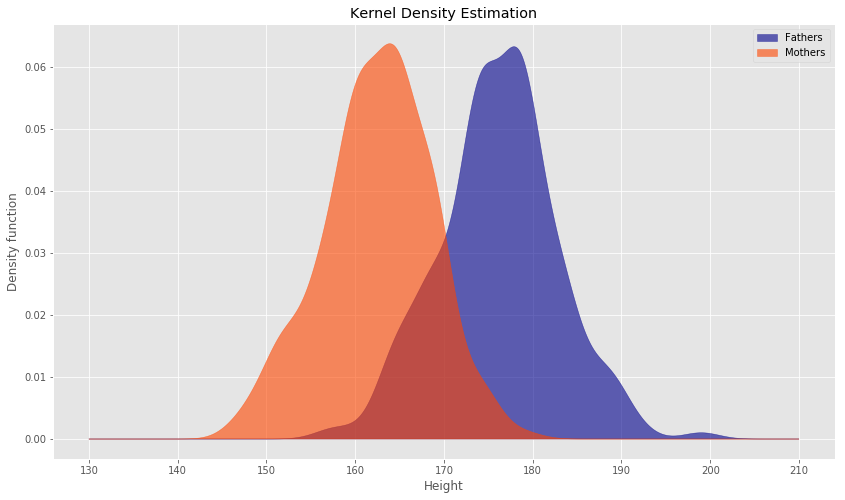

In [7]:
# Density estimators
from sklearn.neighbors.kde import KernelDensity

X_plot = np.linspace(130, 210, 1000)[:, np.newaxis]
fig, ax = plt.subplots()

# Count fathers and mothers once (drop duplicates or else we count them several times)
df_group_family = df[['Family', 'Father', 'Mother']].drop_duplicates()

print(df_group_family.head())

## FATHER
X_father = df_group_family.Father.values.reshape(len(df_group_family), 1)
kde_father = KernelDensity(kernel='gaussian', bandwidth=2).fit(X_father)
log_dens_father = kde_father.score_samples(X_plot)

# Plot density
ax.fill(X_plot, np.exp(log_dens_father), color='darkblue', alpha=alp, label='Fathers')

## MOTHER
X_mother = df_group_family.Mother.values.reshape(len(df_group_family), 1)
kde_mother = KernelDensity(kernel='gaussian', bandwidth=2).fit(X_mother)
log_dens_mother = kde_mother.score_samples(X_plot)

# Plot density
ax.fill(X_plot, np.exp(log_dens_mother), color='orangered', alpha=alp, label='Mothers')

plt.title('Kernel Density Estimation')
plt.xlabel('Height')
plt.ylabel('Density function')
plt.legend()
plt.show()

#df.Father.plot.density(color='steelblue', label='Father', linewidth=lw, alpha=alp)
#df.Mother.plot.density(color='coral', label='Mother', linewidth=lw, alpha=alp)
#plt.legend()
#plt.show()

### Question 4

Afficher la taille du père en fonction de la taille de la mère pour les $n$ observations figurant dans les données. Ajouter la droite de prédiction obtenue par la méthode des moindres carrés (avec constante et sans centrage/normalisation).

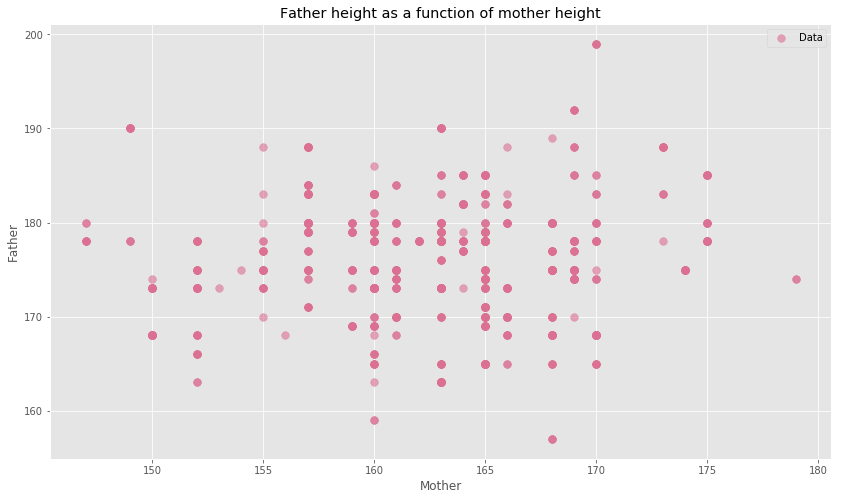

In [8]:
# Father's height as a function of mother's height
# use matplotlib here
plt.scatter(df.Mother, df.Father, color='palevioletred', s=sc, alpha=alp, label='Data')

plt.xlabel('Mother')
plt.ylabel('Father')
plt.legend()
plt.title('Father height as a function of mother height')
plt.show()

In [9]:
# Add linear regression : with constant and with no normalization
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Create linear regression object
lr_q4 = linear_model.LinearRegression(fit_intercept=True)

# Fit model
# Reshape data for sklearn linear regression
father_y = df.Father.values.reshape(length, 1)
mother_x = df.Mother.values.reshape(length, 1)
lr_q4.fit(mother_x, father_y)

# Make predictions using the testing set
father_pred = lr_q4.predict(mother_x)

# The coefficients
print('Theta 1: ', lr_q4.coef_[0][0])

print('Theta 0: ', lr_q4.intercept_[0])

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(father_y, father_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(father_y, father_pred))

Theta 1:  0.0721827955331
Theta 0:  164.111174597
Mean squared error: 38.34
Variance score: 0.00


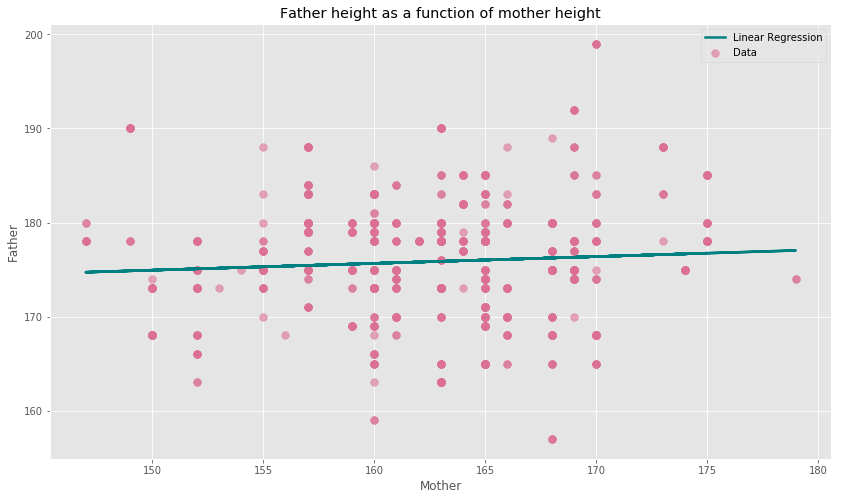

Equation : y = 164.11117 + 0.07218 x


In [10]:
# Plot outputs
plt.scatter(df.Mother, df.Father, color='palevioletred', s=sc, alpha=alp, label='Data')

plt.plot(mother_x, father_pred, color='teal', linewidth=lw, label='Linear Regression')

plt.xlabel('Mother')
plt.ylabel('Father')
plt.title('Father height as a function of mother height')

plt.legend()
plt.show()

# Print the equation
print('Equation : y = %.5f + %.5f x' %((lr_q4.intercept_[0]),lr_q4.coef_[0][0]))

### Question 5

Afficher un histogramme du nombre d'enfants par famille

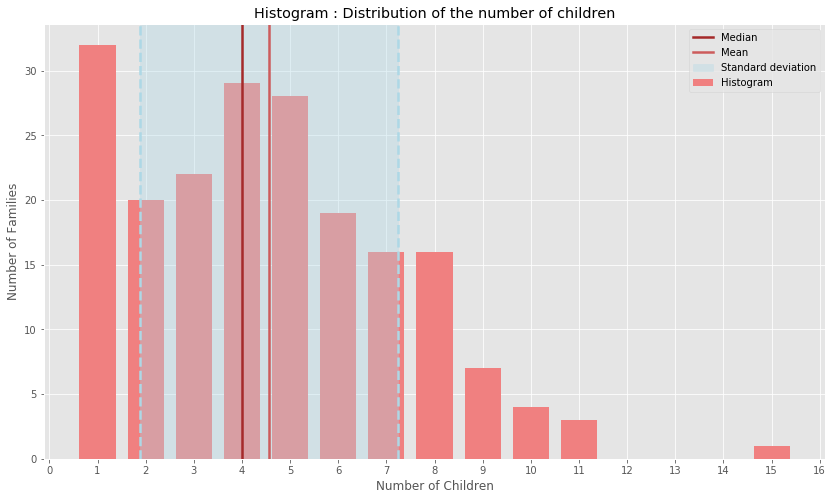

In [11]:
import matplotlib.ticker as plticker

fig, ax = plt.subplots()

# Number of children per family
count_children = df[['Family', 'Kids']].drop_duplicates()
#print(count_children.head())

df_hist = count_children.groupby('Kids').count()
#print(df_hist)

# Statistics
median = np.median(count_children['Kids'].values)
mean = np.mean(count_children['Kids'].values)      
std_dev = np.std(count_children['Kids'].values)     

ax.bar(df_hist.index.values, df_hist['Family'].values, color='lightcoral', width=0.75, align='center', label='Histogram')

# Draw median and mean
color_std_dev='lightblue'
color_mean='indianred'
color_median='brown'
ax.axvline(x=median, linewidth=lw, color=color_median, label='Median')
ax.axvline(x=mean, linewidth=lw, color=color_mean, label='Mean')
ax.axvspan(mean-std_dev, mean+std_dev, alpha=0.35, color=color_std_dev, label='Standard deviation')
ax.axvline(x=mean-std_dev, linestyle='--', linewidth=lw, color=color_std_dev)
ax.axvline(x=mean+std_dev, linestyle='--', linewidth=lw, color=color_std_dev)

loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.title('Histogram : Distribution of the number of children')
plt.xlabel('Number of Children')
plt.ylabel('Number of Families')
plt.legend()
plt.show()

### Question 6

Créer une colonne supplémentaire appelée 'MidParents' qui contient la taille du parent moyen, et valant ('Father'+ 1.08 * 'Mother')/2

In [12]:
# Add an additional column 'MidParents'
df.loc[:, 'MidParents'] = (df.Father + 1.08 * df.Mother)/2

print(df.head())

  Family  Father  Mother Gender  Height  Kids  MidParents
0      1   199.0   170.0      M   186.0     4      191.30
1      1   199.0   170.0      F   176.0     4      191.30
2      1   199.0   170.0      F   175.0     4      191.30
3      1   199.0   170.0      F   175.0     4      191.30
4      2   192.0   169.0      M   187.0     4      187.26


### Question 7

Estimer $\theta_0$, $\theta_1$, par $\hat{\theta}_0$, $\hat{\theta}_1$ en utilisant la fonction LinearRegression de sklearn, puis vérifier numériquement 2 les formules vues en cours pour le cas unidimensionnel.

In [13]:
# x_i midparent's height
# y_i child's height

# Colors depending on gender
color_list = ['c' if gender=='M' else 'slateblue' \
              for gender in df.Gender.values]

### NORMALIZATION (OLD - NOT USED ANYMORE)
# Normalize data
# midparent
from sklearn.preprocessing import StandardScaler
midparent = df.MidParents.values.reshape(length, 1)
scaler_midparent = StandardScaler().fit(midparent)
midparent_std = scaler_midparent.transform(midparent)

# child
child = df.Height.values.reshape(length, 1)
scaler_child = StandardScaler().fit(child)
child_std = scaler_child.transform(child)

# Check for midparent if everything is fine 
# We only try for midparent here but it is the same method for children
print(np.isclose(scaler_midparent.mean_, np.mean(midparent)))
print(np.array_equal(scaler_midparent.scale_[0], np.std(midparent)))
print(np.array_equal(midparent_std,
(midparent - np.mean(midparent)) / np.std(midparent)))

[ True]
True
True


In [14]:
# Linear Regression
# Create linear regression object
lr_q7 = linear_model.LinearRegression(fit_intercept=True)

# Fit model
lr_q7.fit(midparent, child)

# Make predictions
child_pred = lr_q7.predict(midparent)

# The coefficients
print('Theta 1: ', lr_q7.coef_[0][0])

print('Theta 0: ', lr_q7.intercept_[0])

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(child, child_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(child, child_pred))

Theta 1:  0.633093766663
Theta 0:  58.255916588
Mean squared error: 74.41
Variance score: 0.10


Vérifier numériquement les formules vues en cours pour le cas unidimensionnel

In [15]:
# Verifications
# Original thetas
theta_0 = lr_q7.intercept_[0]
theta_1 = lr_q7.coef_[0][0]

# For theta 1 : Compute numerator et denominator
child_sub = child - np.mean(child)
midparent_sub = midparent - np.mean(midparent)
sum_term = child_sub * midparent_sub 

# Left term of the equation for theta 0
left_term_0 = np.mean(child) - theta_1 * np.mean(midparent)

# Left term of the equation for theta 1
left_term_1 = np.sum(sum_term) / np.sum(midparent_sub**2)

print('Testing equality for first equation : ', np.isclose(theta_0, left_term_0))
print('Theta 0 : {} and Left Term 0 : {}'.format(theta_0, left_term_0))
print()

print('Testing equality for second equation : ', np.isclose(theta_1, left_term_1))
print('Theta 1 : {} and Left Term 1 : {}'.format(theta_1, left_term_1))

Testing equality for first equation :  True
Theta 0 : 58.255916588003515 and Left Term 0 : 58.255916588003515

Testing equality for second equation :  True
Theta 1 : 0.6330937666628674 and Left Term 1 : 0.6330937666628673


### Question 8

Calculer et visualiser les valeurs prédites $\hat{y}_i = \hat{\theta}_0 + \hat{\theta}_1 x_i$ et les $y_i$ sur un même graphique. On affichera de couleurs différentes les données correspondant aux garçons et celles correspondant aux filles.

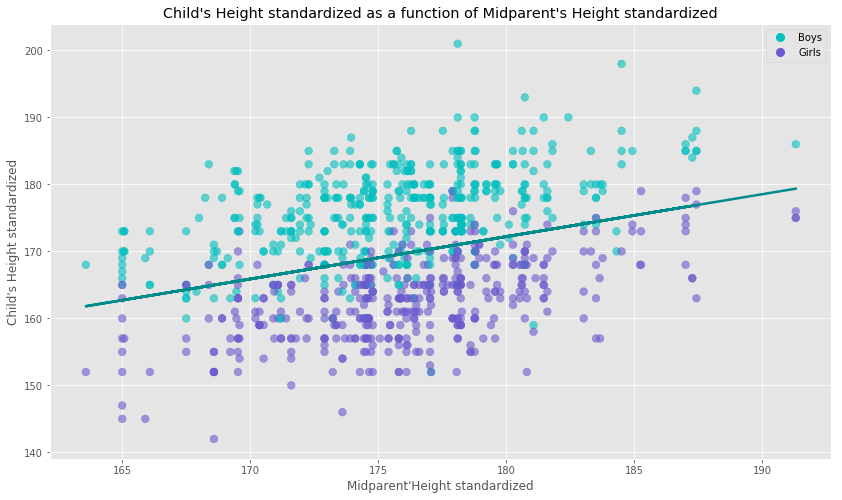

Equation : y = 58.255916588003515 + 0.6330937666628674 x


In [16]:
# Plot everything
scat = plt.scatter(midparent, child, s=sc, color=color_list, label='Data', alpha=alp)
regr = plt.plot(midparent, child_pred, linewidth=lw, color='darkcyan', label='Linear Regression')

plt.xlabel("Midparent'Height standardized")
plt.ylabel("Child's Height standardized")
plt.title("Child's Height standardized as a function of Midparent's Height standardized")

boy_line = mlines.Line2D([], [], color='c', marker='o',
                          markersize=8, linewidth=0, label='Boys')
girl_line = mlines.Line2D([], [], color='slateblue', marker='o',
                          markersize=8, linewidth=0, label='Girls')

plt.legend(handles=[boy_line, girl_line])
plt.show()

# Print the equation
print('Equation : y = {} + {} x'.format((lr_q7.intercept_[0]),lr_q7.coef_[0][0]))

### Question 9

Visualiser un estimateur de la densité des résidus $r_i = y_i - \hat{y}_i$. L'hypothèse de normalité est-elle crédible selon vous ? Calculer ensuite $\alpha_g$ (resp. $\alpha_f$ ) les proportions de garçons (resp.de filles) dans la population. On ajoutera ensuite sur le graphique précédent, les fonctions $\alpha_g p_g$ et $\alpha_f p_f$ , avec $p_g$ (resp. $p_f$ ) les densités des résidus pour les garçons (resp. pour les filles).

In [17]:
# Define residual DataFrame
residual = pd.DataFrame(child-child_pred, columns=['Residuals'])

print(residual.head())

   Residuals
0   6.633246
1  -3.366754
2  -4.366754
3  -4.366754
4  10.190945


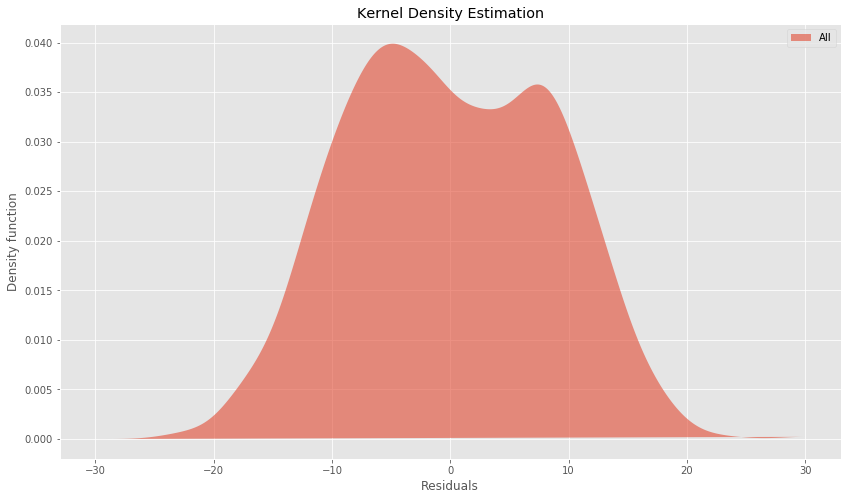

In [18]:
# Gaussian KDE
X_plot = np.linspace(-30, 30, 1000)[:, np.newaxis]
fig, ax = plt.subplots()

# All residuals
X_all = residual.values.reshape(len(residual), 1)
kde_all = KernelDensity(kernel='gaussian', bandwidth=2).fit(X_all)
log_dens_all = kde_all.score_samples(X_plot)

# Plot density
ax.fill(X_plot, np.exp(log_dens_all), alpha=alp, label='All')

plt.title('Kernel Density Estimation')
plt.xlabel('Residuals')
plt.ylabel('Density function')
plt.legend()
plt.show()

Concerning the normality hypothesis, we understance from the previous graph that it is not a valid one, since the kernel density estimation does not represent a classic gaussian curve. We can indeed recognise two distinct bell curves. We will see in the next question a possible explanation.

In [19]:
# Compute alpha_g and alpha_f
# Get values for boys and girls
data_g = df[df['Gender'] == 'M']
data_f = df[df['Gender'] == 'F']

# Proportion of boys
alpha_g = float(len(data_g))/float(length)
print('Proportion of boys in sample : alpha_g = ', str(alpha_g))
print()

# Proportion of girls
alpha_f = float(len(data_f))/float(length)
print('Proportion of girls in sample : alpha_f = ', str(alpha_f))

Proportion of boys in sample : alpha_g =  0.5178173719376392

Proportion of girls in sample : alpha_f =  0.4821826280623608


In [20]:
# Join residual values with corresponding genders
df_joined = residual.join(df['Gender'])

print(df_joined.head())

   Residuals Gender
0   6.633246      M
1  -3.366754      F
2  -4.366754      F
3  -4.366754      F
4  10.190945      M


In [21]:
# Distinguish residuals for boys and girls
boys_res = pd.DataFrame(df_joined[df_joined['Gender'] == 'M']['Residuals'].values, columns=['Residuals Boys'])
girls_res = pd.DataFrame(df_joined[df_joined['Gender'] == 'F']['Residuals'].values, columns=['Residuals Girls'])

print(boys_res.head())
print(girls_res.head())

   Residuals Boys
0        6.633246
1       10.190945
2        7.190945
3        5.875262
4        4.875262
   Residuals Girls
0        -3.366754
1        -4.366754
2        -4.366754
3       -10.809055
4       -10.809055


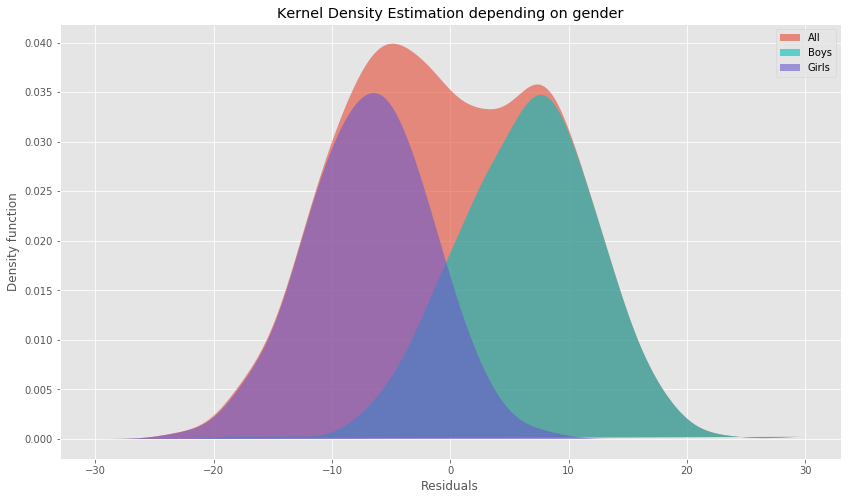

In [22]:
# Gaussian KDE

X_plot = np.linspace(-30, 30, 1000)[:, np.newaxis]
fig, ax = plt.subplots()

## ALL
X_all = residual.values.reshape(len(residual), 1)
kde_all = KernelDensity(kernel='gaussian', bandwidth=2).fit(X_all)
log_dens_all = kde_all.score_samples(X_plot)

# Plot density
ax.fill(X_plot, np.exp(log_dens_all), alpha=alp, label='All')

## BOYS
X_boys = boys_res.values.reshape(len(boys_res), 1)
kde_boys = KernelDensity(kernel='gaussian', bandwidth=2).fit(X_boys)
log_dens_b = kde_boys.score_samples(X_plot)

# Plot density
ax.fill(X_plot, alpha_g * np.exp(log_dens_b), facecolor='c', alpha=alp, label='Boys')

## GIRLS
X_girls = girls_res.values.reshape(len(girls_res), 1)
kde_girls = KernelDensity(kernel='gaussian', bandwidth=2).fit(X_girls)
log_dens_g = kde_girls.score_samples(X_plot)

# Plot density
ax.fill(X_plot, alpha_f * np.exp(log_dens_g), facecolor='slateblue', alpha=alp, label='Girls')

plt.title('Kernel Density Estimation depending on gender')
plt.xlabel('Residuals')
plt.ylabel('Density function')
plt.legend()
plt.show()

The graph above shows the kernel density estimation for boys and girls separately, as well as the kernel density estimation for the whole sample. We can identify the two bells of the previous question with the bell of each gender category. The superposition is visible here. 
There are then two different distributions of the residuals, depending on boys and girls.

### Question 10

Régresser cette fois les $x_i$ sur les $y_i$ (et non plus les $y_i$ sur les $x_i$). On veut comparer numériquement les coefficients $\hat{\alpha}_0$ et $\hat{\alpha}_1$ ainsi obtenus par rapport aux $\hat{\theta}_0$ et $\hat{\theta}_1$ du modèle original.

In [23]:
# Reverse the axes
# Linear Regression
# Create linear regression object
lr_q10 = linear_model.LinearRegression(fit_intercept=True, normalize=True)

# Fit model
lr_q10.fit(child, midparent)

# Make predictions
midparent_pred = lr_q10.predict(child)

# The coefficients
print('Theta 1: ', lr_q10.coef_[0][0])

print('Theta 0: ', lr_q10.intercept_[0])

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(child, child_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(child, child_pred))

Theta 1:  0.161490302931
Theta 0:  148.437160448
Mean squared error: 74.41
Variance score: 0.10


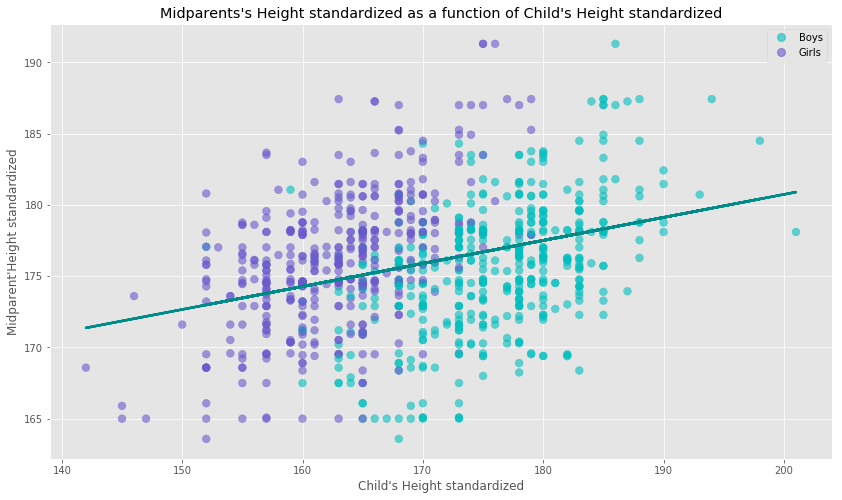

Equation : y = 148.4371604481001 + 0.16149030293099903 x


In [24]:
# Plot everything - Optional 
plt.scatter(child, midparent, s=sc, color=color_list, label='Data', alpha=alp)
plt.plot(child, midparent_pred, linewidth=lw, color='darkcyan', label='Linear Regression')
plt.legend()

plt.xlabel("Child's Height standardized")
plt.ylabel("Midparent'Height standardized")
plt.title("Midparents's Height standardized as a function of Child's Height standardized")

boy_line = mlines.Line2D([], [], color='c', marker='o',
                          markersize=8, linewidth=0,label='Boys', alpha=alp)
girl_line = mlines.Line2D([], [], color='slateblue', marker='o',
                          markersize=8, linewidth=0, label='Girls', alpha=alp)

plt.legend(handles=[boy_line, girl_line])
plt.show()

# Print the equation
print('Equation : y = {} + {} x'.format(lr_q10.intercept_[0],lr_q10.coef_[0][0]))

In [25]:
# Verifications
frac = np.var(midparent) / np.var(child)
compare_mean = np.mean(child) / np.mean(midparent)

# First equation
left_term_0 = np.mean(midparent) +  compare_mean * frac * (theta_0 - np.mean(child))
alpha_0 = lr_q10.intercept_[0]

print('Assert equality between alpha_0 and left term : ', np.isclose(alpha_0, left_term_0))
print('Alpha 0 : {} and Left term 0 : {}'.format(alpha_0, left_term_0))

print()

# Second equation
left_term_1 = frac * theta_1
alpha_1 = lr_q10.coef_[0][0]

print('Assert equality between alpha_1 and left term : ', np.isclose(alpha_1, left_term_1))
print('Alpha 1 : {} and Left term 1 : {}'.format(alpha_1, left_term_1))

Assert equality between alpha_0 and left term :  True
Alpha 0 : 148.4371604481001 and Left term 0 : 148.43716044810006

Assert equality between alpha_1 and left term :  True
Alpha 1 : 0.16149030293099903 and Left term 1 : 0.1614903029309991


## Exercice 2. Analyse du jeu de données auto-mpg

### Question 11

Importer avec Pandas la base de données disponible ici https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original. On ajoutera le nom des colonnes en consultant l'adresse : https://archive.ics.uci.edu/ml/machinelearning-databases/auto-mpg/auto-mpg.names avec l'attribut 'name' de import_csv. On pourra regarder l'intérêt de l'option sep=r"\s+" si besoin. Y a-t-il un marqueur utilisé pour les données manquantes dans le fichier utilisé ? Si besoin, enlever les lignes possédant des valeurs manquantes dans la base de données.

In [26]:
# Load Data
url_2 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original'
na_values_2 = ['NA']
fields_2 = ['mpg','cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
df_2 = pd.read_csv(url_2, sep=r'\s+', na_values=na_values_2, names=fields_2)

# Print loaded data
print(df_2.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0        8.0         307.0       130.0  3504.0          12.0   
1  15.0        8.0         350.0       165.0  3693.0          11.5   
2  18.0        8.0         318.0       150.0  3436.0          11.0   
3  16.0        8.0         304.0       150.0  3433.0          12.0   
4  17.0        8.0         302.0       140.0  3449.0          10.5   

   model year  origin                   car name  
0        70.0     1.0  chevrolet chevelle malibu  
1        70.0     1.0          buick skylark 320  
2        70.0     1.0         plymouth satellite  
3        70.0     1.0              amc rebel sst  
4        70.0     1.0                ford torino  


In [27]:
# Number of lines with missing values
print('Number of lines with missing values : %d' %df_2.isnull().any(axis=1).sum())

# Initial length of df
print('Initial length of df : %d' %len(df_2))

Number of lines with missing values : 14
Initial length of df : 406


In [28]:
# Delete rows with missing values
df_2 = df_2.dropna(axis=0, how='any')
print('New length of df : %d' %len(df_2))

New length of df : 392


### Question 12

Calculer l'estimateur des moindres carrés $\hat{\theta}$ (avec ordonnée à l'origine) et sa prédiction $\hat{y}$ sur une sous partie de la base obtenue en gardant les 9 premières lignes. Que constatez-vous pour les variables cylinders et model year ?

In [29]:
# Numerical features
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']

# The variable we want to explain
explain = 'mpg'

In [30]:
# Take first nine rows
nine_x = df_2.head(n=9)[features]
nine_y = df_2.head(n=9)[explain]

# Convert for linear regression
nine_x_reshaped = nine_x.values.reshape(9, len(features))
nine_y_reshaped = nine_y.values.reshape(9, 1)

In [31]:
# Linear Regression
# Create linear regression object with intercept
lr_q12 = linear_model.LinearRegression(fit_intercept=True)

# Fit model
lr_q12.fit(nine_x_reshaped, nine_y_reshaped)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
# The coefficients
print('Theta 1: ', lr_q12.coef_[0])

print('Theta 0: ', lr_q12.intercept_)

Theta 1:  [ 0.          0.05408848 -0.0945306  -0.00424074 -0.19936701  0.        ]
Theta 0:  [ 30.77169537]


In [33]:
print('--- Features and corresponding impact ---')
df_q12 = pd.DataFrame(np.absolute(lr_q12.coef_[0]), 
                      index=features, 
                      columns=['Coefficients (Absolute value)']).sort_values(by='Coefficients (Absolute value)', ascending=False)

print(df_q12)

--- Features and corresponding impact ---
              Coefficients (Absolute value)
acceleration                       0.199367
horsepower                         0.094531
displacement                       0.054088
weight                             0.004241
cylinders                          0.000000
model year                         0.000000


In order to see the features influence, we have decided to compare the absolute values, since we want to know which features impacts the most, in a positive or negative way. The higher the absolute value is, the bigger the influence of the corresponding feature is on the MPG. 
For variables cylinders and model year, the coefficients are equal to zero. In fact, if we take a look at the nine top rows, cylinders and model year value always take the same values (8.0 and 70.0 respectively) and so they don't contribute in mpg's explanation.

In [34]:
print(df_2.head(n=9))

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0        8.0         307.0       130.0  3504.0          12.0   
1  15.0        8.0         350.0       165.0  3693.0          11.5   
2  18.0        8.0         318.0       150.0  3436.0          11.0   
3  16.0        8.0         304.0       150.0  3433.0          12.0   
4  17.0        8.0         302.0       140.0  3449.0          10.5   
5  15.0        8.0         429.0       198.0  4341.0          10.0   
6  14.0        8.0         454.0       220.0  4354.0           9.0   
7  14.0        8.0         440.0       215.0  4312.0           8.5   
8  14.0        8.0         455.0       225.0  4425.0          10.0   

   model year  origin                   car name  
0        70.0     1.0  chevrolet chevelle malibu  
1        70.0     1.0          buick skylark 320  
2        70.0     1.0         plymouth satellite  
3        70.0     1.0              amc rebel sst  
4        70.0     1.0                ford to

### Question 13

Calculer $\hat{\theta}$ et $\hat{y}$ cette fois sur l'intégralité des données, après les avoir centrées et réduites. Quelles sont les deux variables qui expliquent le plus la consommation d'un véhicule ?

In [35]:
length_2 = len(df_2)

# Normalize data
X = df_2[features].values.reshape(length_2, len(features))
scaler_X = StandardScaler().fit(X)
X_std = scaler_X.transform(X)

y = df_2[explain].values.reshape(length_2, 1)
scaler_y = StandardScaler().fit(y)
y_std = scaler_y.transform(y)

# Check values
print('Variance of X_std : ', np.var(X_std))
print('Variance of y_std : ', np.var(y_std))

Variance of X_std :  1.0
Variance of y_std :  1.0


In [36]:
# Linear Regression
# Create linear regression object with intercept
lr_q13 = linear_model.LinearRegression(fit_intercept=True)

# Fit model
lr_q13.fit(X_std, y_std)

# Make predictions
y_pred = lr_q13.predict(X_std)

# The coefficients
print('Theta 1: ', lr_q13.coef_[0])

print('Theta 0: ', lr_q13.intercept_[0])

print('Features with the greatest impact : {} and {} ' 
      .format(features[np.argsort(np.absolute(lr_q13.coef_[0]))[-1]], 
      features[np.argsort(np.absolute(lr_q13.coef_[0]))[-2]]))

Theta 1:  [-0.07209066  0.10294695 -0.00193001 -0.73944399  0.03014184  0.3555674 ]
Theta 0:  5.30249932075e-16
Features with the greatest impact : weight and model year 


In [37]:
# Print a DataFrame (more visual, althought it won't be useful for this question)
df_q13 = pd.DataFrame(np.absolute(lr_q13.coef_[0]), 
                      index=features, 
                      columns=['Coefficients (Absolute value)']).sort_values(by='Coefficients (Absolute value)', ascending=False)
print(df_q13)

              Coefficients (Absolute value)
weight                             0.739444
model year                         0.355567
displacement                       0.102947
cylinders                          0.072091
acceleration                       0.030142
horsepower                         0.001930


Again, we take the absolute values of each coefficient to compare the impact. According to the obtained values, the two top variables that explain a vehicule consumption the most seem to be the $\textbf{weight}$ and the $\textbf{model year}$.

In [38]:
print(df_q13[:2])

            Coefficients (Absolute value)
weight                           0.739444
model year                       0.355567


In [39]:
df_q13_2 = pd.DataFrame(lr_q13.coef_[0], index=features, columns=['Coefficients'])

df_q13_joined = df_q13.join(df_q13_2)
print(df_q13_joined)

              Coefficients (Absolute value)  Coefficients
weight                             0.739444     -0.739444
model year                         0.355567      0.355567
displacement                       0.102947      0.102947
cylinders                          0.072091     -0.072091
acceleration                       0.030142      0.030142
horsepower                         0.001930     -0.001930


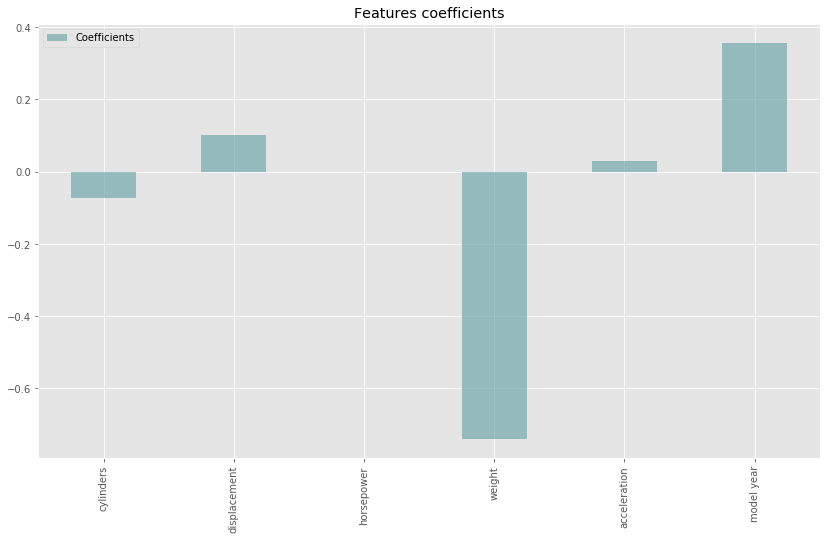

In [40]:
# Even more visual with a bar chart
df_q13_2.plot.bar(color='cadetblue', alpha=alp)

plt.title('Features coefficients')
plt.show()

If however, we take a look at the relative values, we can see that $\textbf{weight}$ and $\textbf{model year}$ have an opposite influence on the MPG. On the one hand the weight has a negative coefficient, which means that the MPG is high when the weight is low (that makes sense in real life : the car consumption is rather big when the car is heavy). On the other hand the model year coefficient is positive, which means that the MPG is high when the car is recent (New cars indeed improved on MPG and thus, the consumption).

### Question 14

Calculer $||r^2||$ (le carré de la norme du vecteur des résidus), puis $||r^2|| / (n-p)$.

In [41]:
# || r || ** 2
r2 = np.linalg.norm(y_std - y_pred)**2
print('Compute r2 : ', r2)
print('Compute r2/(n - p) : ', r2 / float(length_2 - len(features)))

Compute r2 :  74.7719266969
Compute r2/(n - p) :  0.193709654655


In [42]:
# Verify the equation : we compute each term separately
# Create matrix with only ones
ones = np.ones((length_2, 1))

# Compute the term at the right of the equation
right_term_14 = np.linalg.norm(y_std - np.dot(np.mean(y_std), ones), ord=2)**2

# Compute the term at the left of the equation
left_term_14 = r2 + np.linalg.norm(y_pred - np.dot(np.mean(y_std), ones), ord=2)**2

# See if the two computed terms are indeed equal
print('Right term : {} and Left term : {}'.format(right_term_14, left_term_14))
print('Assert Equality between the two terms of the equation : ', np.isclose(right_term_14, left_term_14))

Right term : 392.0 and Left term : 392.00000000000045
Assert Equality between the two terms of the equation :  True


### Question 15

Supposons que l'on vous fournisse les caractéristiques suivantes (voir énoncé) d'un nouveau véhicule. Prédire sa consommation.

In [43]:
# Define the observation xn+1 we want to predict 
x_n_plus_one = np.matrix([6, 225, 100, 3233, 15.4, 76])

# Normalize again
x_n_plus_one_std = scaler_X.transform(x_n_plus_one)

# Use the regression we have created in Question 13 to predict yn+1
y_n_plus_one_pred = lr_q13.predict(x_n_plus_one_std)

# Print yn+1, though it is a normalized value (and so it is difficult to interpret)
print('yn+1 predicted (normalized) : ', y_n_plus_one_pred)

yn+1 predicted (normalized) :  [[-0.21419992]]


In [44]:
# Retrieve corresponding predicted mpg
y_n_plus_one_pred_inversed = scaler_y.inverse_transform(y_n_plus_one_pred)[0][0]

print('Predicted MPG for xn+1 : {} mpg'.format(y_n_plus_one_pred_inversed))
print('Predicted MPG for xn+1 (rounded): {} mpg'.format(math.ceil(y_n_plus_one_pred_inversed)))

Predicted MPG for xn+1 : 21.776220182609457 mpg
Predicted MPG for xn+1 (rounded): 22 mpg


The measured consommation for this observation was 22 mpg. If we round our result, we indeed obtain this value.

### Question 16

Utiliser la transformation PolynomialFeatures de sklearn sur les données brutes, pour ajuster un modèle d'ordre deux (avec les termes d'interactions : interaction_only=False). On normalisera et recentrera après avoir créé les nouvelles variables explicatives. Quelle est alors la variable la plus explicative de la consommation ?

In [45]:
from sklearn.preprocessing import PolynomialFeatures

In [46]:
# Generate polynomial and interaction features
# Generate a new feature matrix of all polynomial combinations 
# of the features with degree less than or equal to the specified degree
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
#poly.fit(X)
X_poly = poly.fit_transform(X)

print(X_poly.shape)
print(X_poly)

#X_poly_features = np.delete(X_poly, 0, axis=1)
#print(X_poly_features.shape)

(392, 27)
[[  8.00000000e+00   3.07000000e+02   1.30000000e+02 ...,   1.44000000e+02
    8.40000000e+02   4.90000000e+03]
 [  8.00000000e+00   3.50000000e+02   1.65000000e+02 ...,   1.32250000e+02
    8.05000000e+02   4.90000000e+03]
 [  8.00000000e+00   3.18000000e+02   1.50000000e+02 ...,   1.21000000e+02
    7.70000000e+02   4.90000000e+03]
 ..., 
 [  4.00000000e+00   1.35000000e+02   8.40000000e+01 ...,   1.34560000e+02
    9.51200000e+02   6.72400000e+03]
 [  4.00000000e+00   1.20000000e+02   7.90000000e+01 ...,   3.45960000e+02
    1.52520000e+03   6.72400000e+03]
 [  4.00000000e+00   1.19000000e+02   8.20000000e+01 ...,   3.76360000e+02
    1.59080000e+03   6.72400000e+03]]


In [47]:
# Take a look at the generated matrix
#print(poly.powers_)

# Print the corresponding names for each line of the matrix
names = poly.get_feature_names(features)

In [48]:
# Print a DataFrame (more visual, althought it won't be useful for this question)
df_poly = pd.DataFrame(poly.powers_, columns=features, index=names)
print(df_poly)

                           cylinders  displacement  horsepower  weight  \
cylinders                          1             0           0       0   
displacement                       0             1           0       0   
horsepower                         0             0           1       0   
weight                             0             0           0       1   
acceleration                       0             0           0       0   
model year                         0             0           0       0   
cylinders^2                        2             0           0       0   
cylinders displacement             1             1           0       0   
cylinders horsepower               1             0           1       0   
cylinders weight                   1             0           0       1   
cylinders acceleration             1             0           0       0   
cylinders model year               1             0           0       0   
displacement^2                     0  

The DataFrame above represents the generated power matrix. The values represent the exponent for the corresponding feature/column. The row names give the result.

In [49]:
# Normalize
scaler_X_poly = StandardScaler().fit(X_poly)
X_poly_std = scaler_X_poly.transform(X_poly)

print(X_poly_std.shape)

(392, 27)


In [50]:
# Linear Regression
# Create linear regression object with intercept
lr_q16 = linear_model.LinearRegression(fit_intercept=True)

# Fit model
lr_q16.fit(X_poly_std, y_std)

# Make predictions
#y_poly_pred = lr_q16.predict(X_poly_std)

# The coefficients
print('Theta 1: ', lr_q16.coef_)
print(lr_q16.coef_.shape)

print('Theta 0: ', lr_q16.intercept_[0])

print(np.argsort(np.absolute(lr_q16.coef_[0])))

Theta 1:  [[ 1.71180206 -6.21342259  0.66121191  2.24128468 -2.05909314 -3.44847856
  -1.04359448 -0.37810782  1.53324849  0.68471369  0.62561356 -2.08199949
   0.16673298  0.43361537  0.66769862 -0.42248173  5.60411262 -0.46076903
  -0.7891122  -0.30618882 -0.62226322  0.40515862  0.10893959 -3.22205455
   0.25580808  1.78493025  3.82916435]]
(1, 27)
Theta 0:  1.0651452827e-14
[22 12 24 19  7 21 15 13 17 20 10  2 14  9 18  6  8  0 25  4 11  3 23  5 26
 16  1]


In [51]:
# Optional : Sort with a DataFrame
theta_poly = pd.DataFrame(np.absolute(lr_q16.coef_.T), index=names, columns=['Coefficients (Absolute value)']).sort_values(by='Coefficients (Absolute value)', ascending=False)

print('--- Feature with the greatest impact ---')
print(theta_poly.head())

--- Feature with the greatest impact ---
                         Coefficients (Absolute value)
displacement                                  6.213423
displacement model year                       5.604113
model year^2                                  3.829164
model year                                    3.448479
weight model year                             3.222055


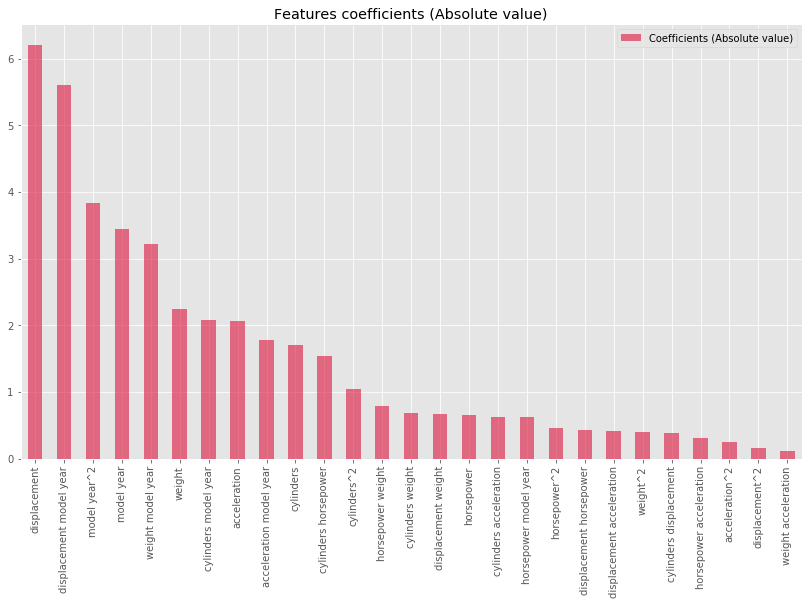

In [52]:
# Even more visual with a bar chart
theta_poly.plot.bar(color='crimson', alpha=alp)

plt.title('Features coefficients (Absolute value)')
plt.show()

Since we only want to know which feature influences the most (the postive or negative influence does not matter for this question) we directly compare the absolute values. The $\textbf{Displacement}$ feature is the one that influences the most, as we can see on the above graph. 

### Question 17

On revient ici au modèle sans interactions. Proposer une manière de gérer la variable origin, par exemple avec pd.get_dummies. On ajustera un modèle linéaire sans constante dans ce cas. Déterminer laquelle des trois origines est la plus efficace en terme de consommation.

In [53]:
# Go back to model without any interaction
# Convert origin to string
df_2['origin'] = df_2['origin'].astype(str)

# Replace origin values with the corresponding (and understandable) values
df_2['origin'] = df_2['origin'].replace(to_replace='1.0',value='USA') \
                .replace(to_replace='2.0',value='Europe') \
                .replace(to_replace='3.0',value='Japan')

print(df_2.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0        8.0         307.0       130.0  3504.0          12.0   
1  15.0        8.0         350.0       165.0  3693.0          11.5   
2  18.0        8.0         318.0       150.0  3436.0          11.0   
3  16.0        8.0         304.0       150.0  3433.0          12.0   
4  17.0        8.0         302.0       140.0  3449.0          10.5   

   model year origin                   car name  
0        70.0    USA  chevrolet chevelle malibu  
1        70.0    USA          buick skylark 320  
2        70.0    USA         plymouth satellite  
3        70.0    USA              amc rebel sst  
4        70.0    USA                ford torino  


In [54]:
# get_dummies : Convert categorical variable into dummy/indicator variables
features_origin = features + ['origin']
df_with_dummies = pd.get_dummies(df_2[features_origin], drop_first=True) # Chose to drop first categorical column (origin_Europe)
print(df_with_dummies.head())

features_origin_all = df_with_dummies.columns.values

   cylinders  displacement  horsepower  weight  acceleration  model year  \
0        8.0         307.0       130.0  3504.0          12.0        70.0   
1        8.0         350.0       165.0  3693.0          11.5        70.0   
2        8.0         318.0       150.0  3436.0          11.0        70.0   
3        8.0         304.0       150.0  3433.0          12.0        70.0   
4        8.0         302.0       140.0  3449.0          10.5        70.0   

   origin_Japan  origin_USA  
0             0           1  
1             0           1  
2             0           1  
3             0           1  
4             0           1  


In [55]:
# Reajust for regression
X_with_dummies = df_with_dummies.values.reshape(len(df_with_dummies), len(df_with_dummies.columns.values))

In [56]:
# Linear Regression

# Normalize
scaler_q17 = StandardScaler().fit(X_with_dummies)
X_with_dummies_std = scaler_q17.transform(X_with_dummies)

# Create linear regression object with intercept - no constant this time
lr_q17 = linear_model.LinearRegression(fit_intercept=False)

# Fit model
lr_q17.fit(X_with_dummies_std, y)

# The coefficients
print('Theta 1: ', lr_q17.coef_)

print('Theta 0: ', lr_q17.intercept_)

Theta 1:  [[-0.83427197  2.50601874 -0.69900932 -5.69254264  0.21795599  2.85870923
   0.08954558 -1.27324442]]
Theta 0:  0.0


In [57]:
# Create a DataFrame to visualise coefficients better
print("--- Origins'coefficients (sorted) ---")
df_coeff_origin = pd.DataFrame(lr_q17.coef_.T, index=features_origin_all, columns=['Coefficients'])
df_coeff_origin.loc['origin_Europe (Dropped)'] = 0 # Set to zero according to our hypothesis (drop)
print(df_coeff_origin.drop(features, axis=0).sort_values(by='Coefficients', ascending=False).head())

--- Origins'coefficients (sorted) ---
                         Coefficients
origin_Japan                 0.089546
origin_Europe (Dropped)      0.000000
origin_USA                  -1.273244


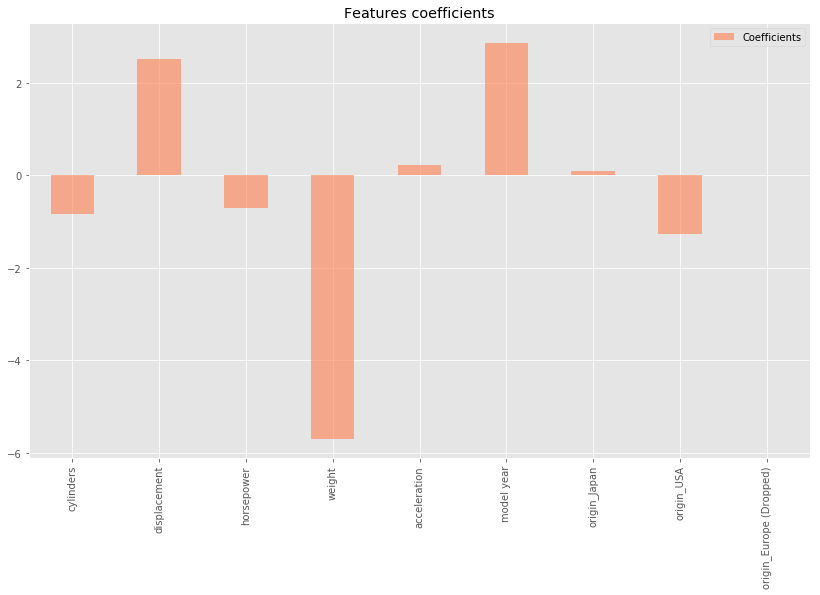

In [58]:
# Even more visual with a bar chart
df_coeff_origin.plot.bar(color='coral', alpha=alp)

plt.title('Features coefficients')
plt.show()

From what we see in the above DataFrame, if origin is USA the coefficient is relatively high in absolute value compared to the two other origins. The USA origin has then the biggest influence on car's MPG. It is however a negative value, which means the coefficient influences the MPG variable in a decreasing way : the car consumes more than cars from Europe and Japan do. We can conclude that the USA origin is the least efficient in terms of consumption : MPG is rather low and the car consumption is then significant. The most efficient origin in terms of consumtion is the one that has the highest positive value, which corresponds to $\textbf{Japan}$. 

### Question 18

Procéder comme pour la question précédente, mais cette fois pour mesurer l'inffluence de la marque de la voiture. On ne considère ici que les variables 'cylinders','displacement','horsepower', 'weight', 'acceleration', 'model year' en plus de la marque. On pourra utiliser str.split, str.replace et get_dummies.

In [59]:
# Influence of the car brand      
# Harmonize car brands
df_2.loc[:, 'brand'] = df_2['car name'].str.split(" ").str.get(0)

df_2['brand'] = df_2['brand'].replace('toyouta', 'toyota')\
.replace('vw', 'volkswagen')\
.replace('vokswagen', 'volkswagen')\
.replace('mercedens-benz', 'mercedes')\
.replace('chevroelt', 'chevrolet')\
.replace('chevy', 'chevrolet')\
.replace('maxda', 'mazda')

all_brands = df_2['brand'].drop_duplicates().values
print(all_brands)

['chevrolet' 'buick' 'plymouth' 'amc' 'ford' 'pontiac' 'dodge' 'toyota'
 'datsun' 'volkswagen' 'peugeot' 'audi' 'saab' 'bmw' 'hi' 'mercury' 'opel'
 'fiat' 'oldsmobile' 'chrysler' 'mazda' 'volvo' 'renault' 'honda' 'subaru'
 'capri' 'mercedes-benz' 'cadillac' 'mercedes' 'triumph' 'nissan']


In [60]:
# get_dummies : Convert categorical variable into dummy/indicator variables
features_brands = features + ['brand']
df_with_brands = pd.get_dummies(df_2[features_brands], drop_first=True) # drop first again
print(len(df_with_brands.columns))

features_brands_all = df_with_brands.columns.values
#print(features_brands_all)

36


In [61]:
# Reajust for regression
X_with_brands = df_with_brands.values.reshape(len(df_with_brands), len(features_brands_all))

In [62]:
# Linear Regression

# Normalize
scaler_q18 = StandardScaler().fit(X_with_brands)
X_with_brands_std = scaler_q18.transform(X_with_brands)

# Create linear regression object with intercept
lr_q18 = linear_model.LinearRegression(fit_intercept=False)

# Fit model
lr_q18.fit(X_with_brands_std, y_std)

# The coefficients
print('Theta 1: ', lr_q18.coef_)
print()

Theta 1:  [[-0.13597706  0.3394969  -0.1213671  -0.69428402  0.01578633  0.35312727
   0.07145436  0.02155529  0.03378544  0.03622118  0.01077596  0.05654416
   0.00194153  0.17630603  0.07103876  0.08836113  0.03110184  0.02973657
   0.11898084  0.07129905  0.03147772  0.04201423  0.0096899   0.0386555
   0.05040946  0.03038605  0.06745355  0.09696853  0.07345533  0.04982911
   0.04370601  0.04451519  0.11194913  0.05540315  0.14603305  0.02668752]]



In [63]:
# Create a DataFrame to visualise coefficients better
print('--- Brands with the greatest impact ---')
df_coeff_brand = pd.DataFrame(lr_q18.coef_.T, index=features_brands_all, columns=['Coefficients'])
df_coeff_brand.loc['brand_amc (Dropped)', :] = 0
print(df_coeff_brand.drop(features, axis=0).sort_values(by='Coefficients', ascending=False))

--- Brands with the greatest impact ---
                     Coefficients
brand_datsun             0.176306
brand_volkswagen         0.146033
brand_honda              0.118981
brand_toyota             0.111949
brand_plymouth           0.096969
brand_fiat               0.088361
brand_pontiac            0.073455
brand_audi               0.071454
brand_mazda              0.071299
brand_dodge              0.071039
brand_peugeot            0.067454
brand_chevrolet          0.056544
brand_triumph            0.055403
brand_oldsmobile         0.050409
brand_renault            0.049829
brand_subaru             0.044515
brand_saab               0.043706
brand_mercedes-benz      0.042014
brand_nissan             0.038656
brand_cadillac           0.036221
brand_buick              0.033785
brand_mercedes           0.031478
brand_ford               0.031102
brand_opel               0.030386
brand_hi                 0.029737
brand_volvo              0.026688
brand_bmw                0.021555
brand_ca

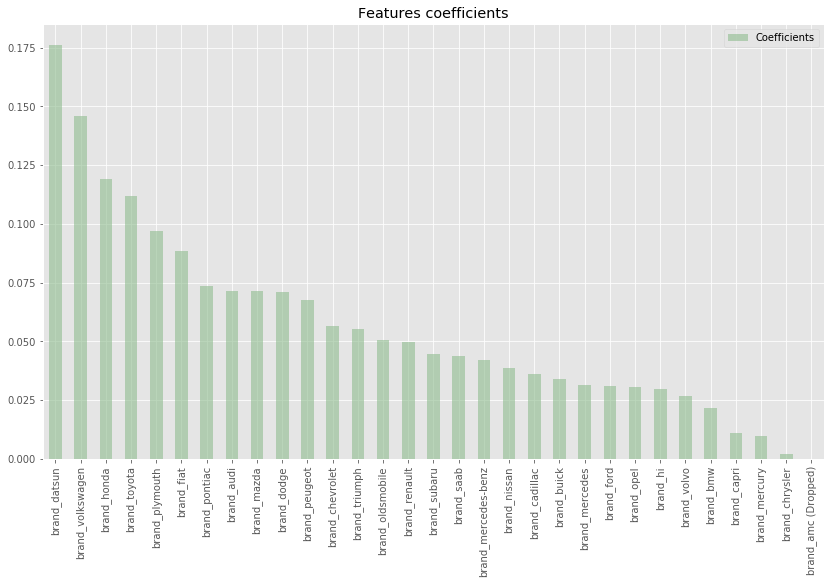

In [64]:
# Even more visual with a bar chart
df_coeff_brand.drop(features, axis=0).sort_values(by='Coefficients', ascending=False).plot.bar(color='darkseagreen', alpha=alp)

plt.title('Features coefficients')
plt.show()

According to the above DataFrame, all brands have a positive coefficient. 
- The highest coefficient corresponds to the $\textbf{Datsun}$ brand. That means that Datsun cars influence the MPG value in an increasing way, and that they consume less than other cars.
- The lowest coefficient, besides the dropped AMC brand in our model, is Chrysler. That means that the MPG value decreases more compared to other brands, and that the cars consume more.

### Queston 19

Reprendre la matrice $X$ obtenue (sans variables catégorielles) question 13. Obtenir numériquement la SVD (partielle) de $X = USV^T$ (par exemple en considérant l'option full_matrices=False) ; vérifier numériquement que $H = UU^T$ est une projection orthogonale.

In [65]:
# Dimensionality reduction using numpy's SVD
U, S, V = np.linalg.svd(X_std, full_matrices=False)

I = np.identity(392)
H = np.dot(U, U.T)

print(H)

#Check if U is an orthogonal projection
print('--- H = H.T ? ---')
print(np.isclose(H, H.T))
print()
print('--- H**2 = H ? ---')
print(np.isclose(np.linalg.matrix_power(H,2), H))

print()
print('H is orthogonal : ', np.all([np.isclose(H, H.T), np.isclose(np.dot(H, H), H)]))

[[ 0.02065728  0.01124934  0.01724967 ..., -0.00234259 -0.01357084
  -0.01591018]
 [ 0.01124934  0.01554721  0.01511478 ..., -0.00476984 -0.00911333
  -0.00992747]
 [ 0.01724967  0.01511478  0.01870652 ..., -0.00298068 -0.01229243
  -0.01401521]
 ..., 
 [-0.00234259 -0.00476984 -0.00298068 ...,  0.02611329  0.00243562
  -0.00088317]
 [-0.01357084 -0.00911333 -0.01229243 ...,  0.00243562  0.0105426
   0.01196426]
 [-0.01591018 -0.00992747 -0.01401521 ..., -0.00088317  0.01196426
   0.01421935]]
--- H = H.T ? ---
[[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]]

--- H**2 = H ? ---
[[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True 

### Question 20

La diagonale de la matrice $H$, forme le vecteur des leviers, qu'on ajoutera comme nouvelle variable. Trier la base de données en fonction de cette variable, et expliquer en quoi les voitures ayant les trois valeurs de levier maximales semblent atypiques.

In [66]:
# Extract H's diagonal
d = np.diag(H)
print(d.shape)
print(np.max(d))

(392,)
0.187359094833


In [67]:
# Add this diagonal to the dataset
df_2['H'] = d
print(df_2.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0        8.0         307.0       130.0  3504.0          12.0   
1  15.0        8.0         350.0       165.0  3693.0          11.5   
2  18.0        8.0         318.0       150.0  3436.0          11.0   
3  16.0        8.0         304.0       150.0  3433.0          12.0   
4  17.0        8.0         302.0       140.0  3449.0          10.5   

   model year origin                   car name      brand         H  
0        70.0    USA  chevrolet chevelle malibu  chevrolet  0.020657  
1        70.0    USA          buick skylark 320      buick  0.015547  
2        70.0    USA         plymouth satellite   plymouth  0.018707  
3        70.0    USA              amc rebel sst        amc  0.018949  
4        70.0    USA                ford torino       ford  0.022969  


In [68]:
# Sort the dataset and print the rows with the highest leverage value
df_2_sorted = df_2.sort_values(by='H', ascending=False)
print(df_2_sorted.head(3))

     mpg  cylinders  displacement  horsepower  weight  acceleration  \
19  14.0        8.0         455.0       225.0  3086.0          10.0   
34   9.0        8.0         304.0       193.0  4732.0          18.5   
32  10.0        8.0         307.0       200.0  4376.0          15.0   

    model year origin                 car name      brand         H  
19        70.0    USA  buick estate wagon (sw)      buick  0.187359  
34        70.0    USA                 hi 1200d         hi  0.084799  
32        70.0    USA                chevy c20  chevrolet  0.061549  


In [69]:
# Sort the dataset and print the rows with the highest leverage value
print(df_2.describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year           H  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    0.015306  
std        2.758864    3.683737    0.013788  
min        8.000000   70.000000    0.001825  
25%       13.775000   73.000000    0.007979  
50%       15.500000   76.000000    0.011807  
75%       17.025000   79.0000

Let's compare the 3 presented observations with the data's statistical description. 
- For the 3 cars the cylinders'value is 8.0, which according to the statitical description is the maximum value.
- Their MPG is among the lowest (25% of cars have a MPG lower than 17.0) which means that their consumption is highly significant compared to other cars.
- Their model year is also the minimum. They are old cars, which can explain the high consumption value as well.
- Features such as horsepower and weight are also quite important if we compare with the statistical description.
- The three of them are from the same origin : USA.

Based on these remarks, we can conclude that these observations are "extreme" points in our data : they are undoubtly above or below average on several features. The (high) leverage values highlight these extreme observations.

Observations with a significant leverage value influence the regression line more than centered observations. In fact, they tend to aim the coefficients towards them.